In [65]:
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Objective: Predict the Introverts from the Extroverts

- submission file format:

```
id,Personality
18524,Extrovert
18525,Introvert
18526,Introvert
etc.
```

- initial number of samples in train dataset: 18524
- initial number of samples in test dataset: 6174




In [66]:
train_data = pd.read_csv('data/train.csv')
train_data

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert
...,...,...,...,...,...,...,...,...,...
18519,18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert
18520,18520,1.0,NaN,6.0,7.0,No,6.0,5.0,Extrovert
18521,18521,7.0,Yes,1.0,1.0,Yes,1.0,NaN,Introvert
18522,18522,NaN,Yes,1.0,0.0,Yes,5.0,2.0,Introvert


In [67]:
preprocessed_data = train_data.dropna(axis=0)
preprocessed_data = preprocessed_data.drop('id', axis=1)
preprocessed_data

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
7,2.0,No,8.0,3.0,No,4.0,5.0,Extrovert
9,1.0,No,8.0,6.0,No,14.0,9.0,Extrovert
...,...,...,...,...,...,...,...,...
18509,1.0,No,3.0,4.0,No,15.0,4.0,Extrovert
18511,0.0,No,4.0,5.0,No,11.0,4.0,Extrovert
18514,6.0,No,5.0,3.0,No,10.0,4.0,Extrovert
18519,3.0,No,7.0,3.0,No,9.0,7.0,Extrovert


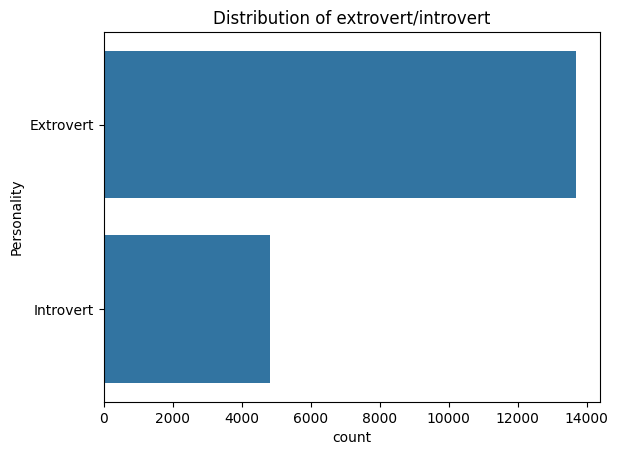

In [68]:
sns.countplot(y='Personality', data=train_data)
plt.title('Distribution of extrovert/introvert')
plt.show()

In [69]:
print(preprocessed_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           10189 non-null  float64
 1   Stage_fear                 10189 non-null  object 
 2   Social_event_attendance    10189 non-null  float64
 3   Going_outside              10189 non-null  float64
 4   Drained_after_socializing  10189 non-null  object 
 5   Friends_circle_size        10189 non-null  float64
 6   Post_frequency             10189 non-null  float64
 7   Personality                10189 non-null  object 
dtypes: float64(5), object(3)
memory usage: 716.4+ KB
None


In [70]:
print(preprocessed_data.describe())

       Time_spent_Alone  Social_event_attendance  Going_outside  \
count      10189.000000             10189.000000   10189.000000   
mean           2.633134                 5.681519       4.444793   
std            2.630621                 2.597142       1.884790   
min            0.000000                 0.000000       0.000000   
25%            1.000000                 4.000000       3.000000   
50%            2.000000                 6.000000       5.000000   
75%            3.000000                 8.000000       6.000000   
max           11.000000                10.000000       7.000000   

       Friends_circle_size  Post_frequency  
count         10189.000000    10189.000000  
mean              8.503092        5.500834  
std               4.073302        2.709847  
min               0.000000        0.000000  
25%               5.000000        3.000000  
50%               9.000000        6.000000  
75%              12.000000        8.000000  
max              15.000000       10.

In [71]:
# categorical_columns = preprocessed_data.select_dtypes(include=['object']).columns.tolist()
preprocessed_data['Stage_fear'] = preprocessed_data['Stage_fear'].map({'Yes': 1, 'No': 0})
preprocessed_data['Stage_fear'] = preprocessed_data['Stage_fear'].astype(float)
preprocessed_data['Drained_after_socializing'] = preprocessed_data['Drained_after_socializing'].map({'Yes': 1, 'No': 0})
preprocessed_data['Drained_after_socializing'] = preprocessed_data['Drained_after_socializing'].astype(float)
preprocessed_data['Personality'] = preprocessed_data['Personality'].map({'Introvert': 1, 'Extrovert': 0})
preprocessed_data['Personality'] = preprocessed_data['Personality'].astype(float)

X = preprocessed_data.drop('Personality', axis=1)
y = preprocessed_data['Personality']



In [72]:
print(preprocessed_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 10189 entries, 0 to 18523
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           10189 non-null  float64
 1   Stage_fear                 10189 non-null  float64
 2   Social_event_attendance    10189 non-null  float64
 3   Going_outside              10189 non-null  float64
 4   Drained_after_socializing  10189 non-null  float64
 5   Friends_circle_size        10189 non-null  float64
 6   Post_frequency             10189 non-null  float64
 7   Personality                10189 non-null  float64
dtypes: float64(8)
memory usage: 716.4 KB
None


In [73]:
correlations = preprocessed_data.corr()
print(correlations['Personality'].sort_values(ascending=False))

Personality                  1.000000
Stage_fear                   0.872364
Drained_after_socializing    0.870648
Time_spent_Alone             0.712608
Friends_circle_size         -0.551907
Post_frequency              -0.571306
Going_outside               -0.590319
Social_event_attendance     -0.607804
Name: Personality, dtype: float64


In [83]:
X = X.drop(['Friends_circle_size','Post_frequency'], axis=1)
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
0,0.0,0.0,6.0,4.0,0.0
1,1.0,0.0,7.0,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0
7,2.0,0.0,8.0,3.0,0.0
9,1.0,0.0,8.0,6.0,0.0
...,...,...,...,...,...
18509,1.0,0.0,3.0,4.0,0.0
18511,0.0,0.0,4.0,5.0,0.0
18514,6.0,0.0,5.0,3.0,0.0
18519,3.0,0.0,7.0,3.0,0.0


In [84]:
from sklearn.preprocessing import StandardScaler
X_norm = StandardScaler().fit(X).transform(X)
X

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
0,0.0,0.0,6.0,4.0,0.0
1,1.0,0.0,7.0,3.0,0.0
3,3.0,0.0,7.0,3.0,0.0
7,2.0,0.0,8.0,3.0,0.0
9,1.0,0.0,8.0,6.0,0.0
...,...,...,...,...,...
18509,1.0,0.0,3.0,4.0,0.0
18511,0.0,0.0,4.0,5.0,0.0
18514,6.0,0.0,5.0,3.0,0.0
18519,3.0,0.0,7.0,3.0,0.0


In [85]:
X.describe()

,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing
count,10189.000000,10189.000000,10189.000000,10189.000000,10189.000000
mean,2.633134,0.166945,5.681519,4.444793,0.167043
std,2.630621,0.372945,2.597142,1.884790,0.373032
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000,0.000000
50%,2.000000,0.000000,6.000000,5.000000,0.000000
75%,3.000000,0.000000,8.000000,6.000000,0.000000
max,11.000000,1.000000,10.000000,7.000000,1.000000


In [86]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_norm,y,test_size=0.3,random_state=42)

In [94]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.995:
            self.model.stop_training = True
            print("\nReached 99.5% accuracy so cancelling training!")

In [90]:
# Build the classification model
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(5,)),  
    # tf.keras.layers.Flatten(),         
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(1, activation='sigmoid') 
])  

model.compile(loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
    metrics=['accuracy'])



In [91]:
training_model = model.fit(
	x=X_train,
    y=y_train,
    epochs=15,
    callbacks=[EarlyStoppingCallback()]
)

Epoch 1/15
223/223 [==============================] - 0s 586us/step - loss: 0.1487 - accuracy: 0.9666
Epoch 2/15
223/223 [==============================] - 0s 620us/step - loss: 0.1398 - accuracy: 0.9668
Epoch 3/15
223/223 [==============================] - 0s 596us/step - loss: 0.1398 - accuracy: 0.9669
Epoch 4/15
223/223 [==============================] - 0s 614us/step - loss: 0.1407 - accuracy: 0.9666
Epoch 5/15
223/223 [==============================] - 0s 543us/step - loss: 0.1388 - accuracy: 0.9669
Epoch 6/15
223/223 [==============================] - 0s 534us/step - loss: 0.1391 - accuracy: 0.9669
Epoch 7/15
223/223 [==============================] - 0s 542us/step - loss: 0.1388 - accuracy: 0.9668
Epoch 8/15
223/223 [==============================] - 0s 722us/step - loss: 0.1391 - accuracy: 0.9665
Epoch 9/15
223/223 [==============================] - 0s 558us/step - loss: 0.1387 - accuracy: 0.9668
Epoch 10/15
223/223 [==============================] - 0s 594us/step - loss: 0.137

# Testing model performance with test set

In [92]:
model.evaluate(X_test, y_test)

96/96 [==============================] - 0s 533us/step - loss: 0.1640 - accuracy: 0.9575


[0.16395552456378937, 0.9574746489524841]

# Testing on my friends

In [93]:
friend_df = pd.read_csv("data/friends.csv")

X_friend = friend_df.drop(columns=['name'])

prediction = model.predict(X_friend)

predicted_class = (prediction >= 0.5).astype(int)

for i in range(len(friend_df)):
    name = friend_df.loc[i, 'name']
    personality = "Introvert" if predicted_class[i][0] == 1 else "Extrovert"
    print(f"{name} is predicted to be an {personality}")



1/1 [==============================] - 0s 24ms/step
Ashraya is predicted to be an Extrovert
thrshika is predicted to be an Introvert


# NOW THE ACTUAL TESTING

In [96]:
test_df = pd.read_csv("data/test.csv")

# 2. Save 'id' column for later
ids = test_df['id']

# 3. Preprocess the test data same as training
test_df['Stage_fear'] = test_df['Stage_fear'].map({'Yes': 1, 'No': 0}).astype(float)
test_df['Drained_after_socializing'] = test_df['Drained_after_socializing'].map({'Yes': 1, 'No': 0}).astype(float)

# 4. Drop unwanted columns
X_test = test_df.drop(['id', 'Friends_circle_size', 'Post_frequency'], axis=1)

# 5. Normalize using the **same** scaler used in training
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)  # X from your original training data
X_test_norm = scaler.transform(X_test)

# 6. Predict using the TensorFlow model
predictions = model.predict(X_test_norm)
predicted_classes = (predictions > 0.5).astype(int)

# 7. Map predictions to labels
personality_labels = ['Extrovert', 'Introvert']
predicted_labels = [personality_labels[int(label)] for label in predicted_classes]

# 8. Create output DataFrame
output_df = pd.DataFrame({
    'id': ids,
    'Personality': predicted_labels
})

# 9. Save to CSV
output_df.to_csv('output.csv', index=False)
print("Predictions saved to output.csv")

193/193 [==============================] - 0s 416us/step
Predictions saved to output.csv
